In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the dataset
df = pd.read_csv("C:/Users/DELL/Downloads/Superstore Sales/train.csv")


In [10]:
# Load the dataset
df = pd.read_csv("C:/Users/DELL/Downloads/Superstore Sales/train.csv")


# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [12]:
# Drop unnecessary columns
df.drop(columns=['Row ID', 'Postal Code'], inplace=True, errors='ignore')

# Convert 'Order Date' column to datetime with correct format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Check for any failed conversions
print(df['Order Date'].isna().sum())  # If this is > 0, some dates failed to convert

# Drop rows with invalid dates (optional)
df.dropna(subset=['Order Date'], inplace=True)

# Fill missing values in other columns (if necessary)
df.fillna(0, inplace=True)

print("Date conversion successful!")
print(df.head())

0
Date conversion successful!
         Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
2  CA-2017-138688 2017-06-12  16/06/2017    Second Class    DV-13045   
3  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   
4  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  Region       Product ID         Category Sub-Category  \
0  South  FUR-B

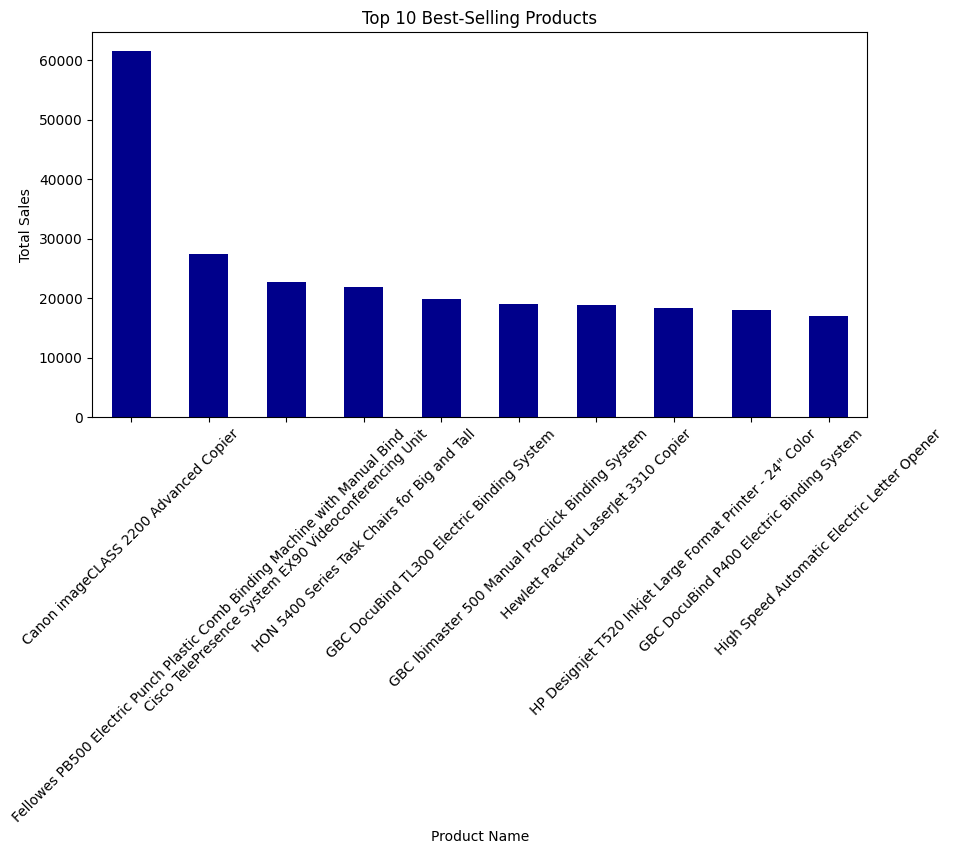

In [14]:
#Exploratory Data Analysis (EDA)
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='darkblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3772\3081585334.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['Sales'].sum().plot(figsize=(12,6), color='green')


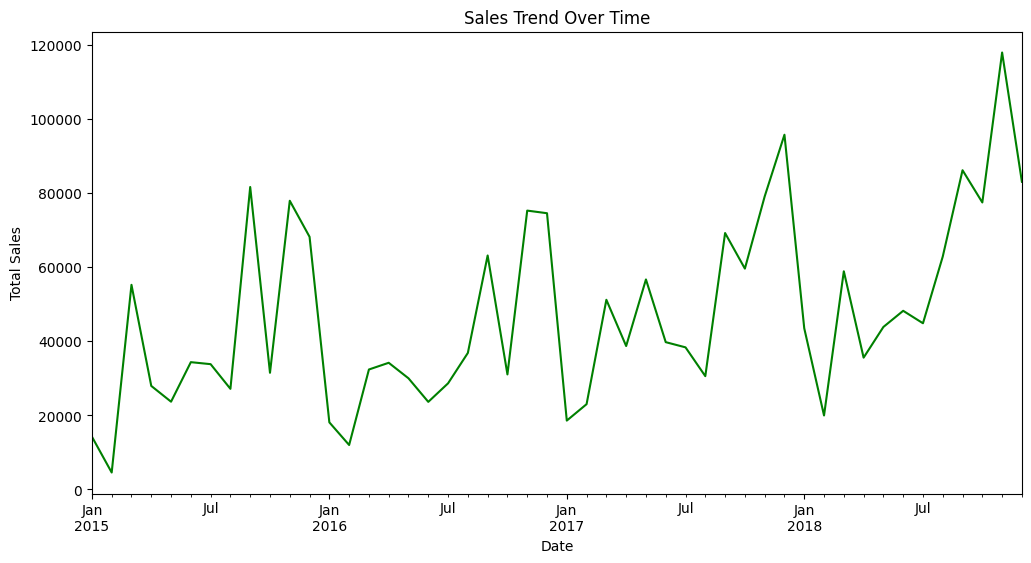

In [15]:
#Sales Trend Over Time
df.set_index('Order Date', inplace=True)
df.resample('M')['Sales'].sum().plot(figsize=(12,6), color='green')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3772\4208684524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Region'], y=df['Sales'], estimator=sum, palette='viridis')


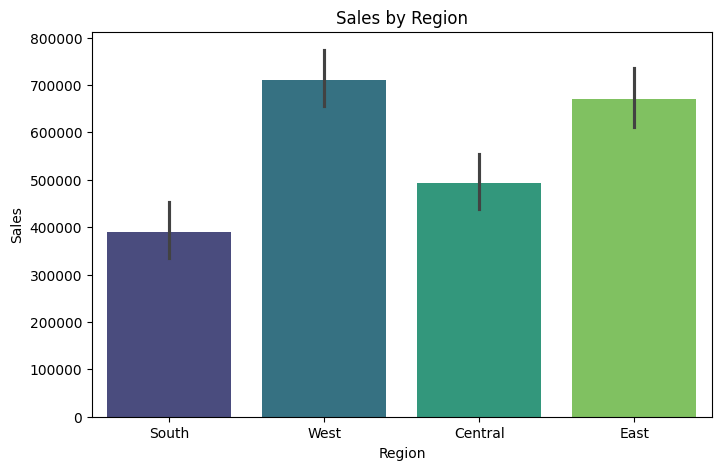

In [16]:
#Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x=df['Region'], y=df['Sales'], estimator=sum, palette='viridis')
plt.title("Sales by Region")
plt.show()


In [30]:
df.columns = df.columns.str.strip().str.lower()  # Removes spaces and converts to lowercase


In [34]:
profit_margin = 0.2  # Assume 20% profit margin
df['cost'] = df['sales'] * (1 - profit_margin)  # Estimating cost
df['profit'] = df['sales'] - df['cost']


C:\Users\DELL\AppData\Local\Temp\ipykernel_3772\1738047101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='profit', data=df, palette='coolwarm')


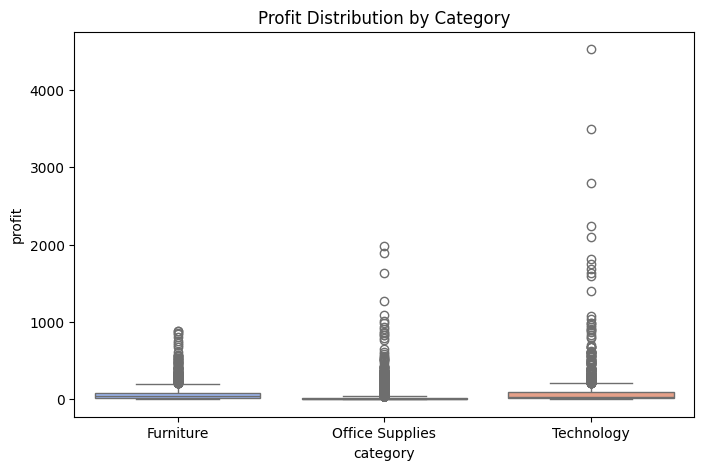

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='category', y='profit', data=df, palette='coolwarm')
plt.title("Profit Distribution by Category")
plt.show()
